In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sklearn.model_selection as ms
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import FunctionTransformer

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
import seaborn as sns
sns.set(style = 'ticks')

# Loading the dataset

In [3]:
titanic = pd.read_csv('train.csv', index_col="PassengerId")
titanic.head(6)

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S  
6                0      0            330877   8.4583   NaN        Q

##### The Titanic data set is a data set that records various attributes of passengers on the Titanic, including who survived and who didn’t.

# Data Exploration

In [4]:
titanic.shape

(891, 11)

##### the dataset consists of 891 rows and 11 columns

In [5]:
#Data Dictionary
#Variable  Definition                      Key
#survived  Survival                        0 = No, 1 = Yes
#pclass    Ticket class                    1 = 1st, 2 = 2nd, 3 = 3rd
#sex       Sex
#Age       Age in years 
#sibsp     # of siblings / spouses aboard the Titanic
#parch     # of parents / children aboard the Titanic
#ticket    Ticket number
#fare      Passenger fare 
#cabin     Cabin number 
#embarked  Port of Embarkation              C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

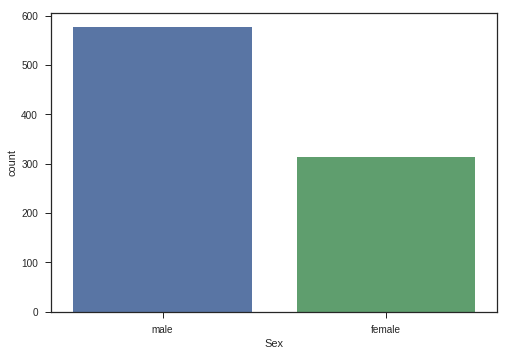

In [7]:
x = sns.countplot(x="Sex", data=titanic)

##### The plot shows that there are 577 male and 314 female passengers travelling in titanic

In [8]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

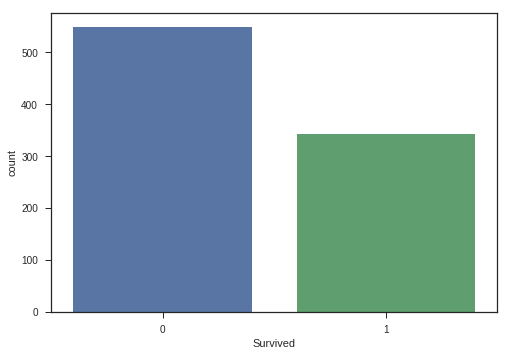

In [9]:
x = sns.countplot(x="Survived", data=titanic)

##### The plot shows the no of passengers survived and no of passengers died.  Out 0f 891, 342 were survived and 549 died

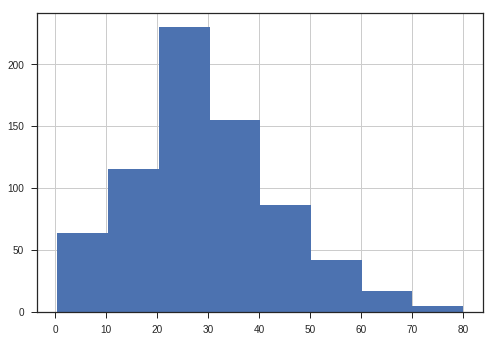

In [10]:
x = titanic['Age'].hist(bins = 8)

##### The plot shows the distribution of people among differrnt age groups. There are more no of passengers belonging to age-group of 20-30 

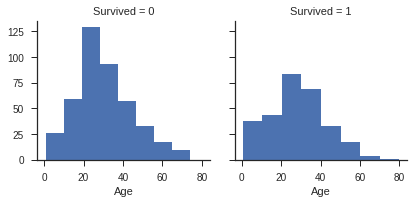

In [11]:
x = sns.FacetGrid(titanic, col = 'Survived')
x = x.map(plt.hist, 'Age', bins = 8)

##### The  plot shows the no of people survived and no of people died in different age groups

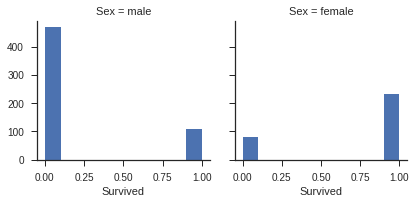

In [12]:
x = sns.FacetGrid(titanic, col = 'Sex')
x = x.map(plt.hist, 'Survived')

##### The plot(left) shows the no of male passengers died and survived. The plot(right) shows the no of female passengers died and survived

# Exercise : Plot the graphs for the Survival% with respect to different attributes(embarked, sex, pclass)

In [13]:
a = (titanic.groupby('Embarked')['Survived'].sum()/titanic.groupby('Embarked').size())*100
a.name = 'values'
a1 = a.reset_index()
a1

Embarked     values
0        C  55.357143
1        Q  38.961039
2        S  33.695652

In [14]:
def abc(df, gro_col, col):
    a = (df.groupby(gro_col)[col].sum()/df.groupby(gro_col).size())*100
    a.name = 'values'
    a1 = a.reset_index()
    return a1

In [15]:
abc(titanic, 'Embarked', 'Survived')

Embarked     values
0        C  55.357143
1        Q  38.961039
2        S  33.695652

In [16]:
abc(titanic, 'Sex', 'Survived')

Sex     values
0  female  74.203822
1    male  18.890815

##### Passengers emabarked at C survived most 55.35%

In [14]:
b = (titanic.groupby('Sex')['Survived'].sum()/titanic.groupby('Sex').size())*100
b.name = 'values'
b1 = b.reset_index()
b1

Sex     values
0  female  74.203822
1    male  18.890815

##### 74.20 % of the female passengers survived whereas only 18.89% of the male passengers survived

In [15]:
c = (titanic.groupby('Pclass')['Survived'].sum()/titanic.groupby('Pclass').size())*100
c.name = 'values'
c1 = c.reset_index()
c1

Pclass     values
0       1  62.962963
1       2  47.282609
2       3  24.236253

##### Passengers travellling in the first class has more survival rate i.e 62.9629

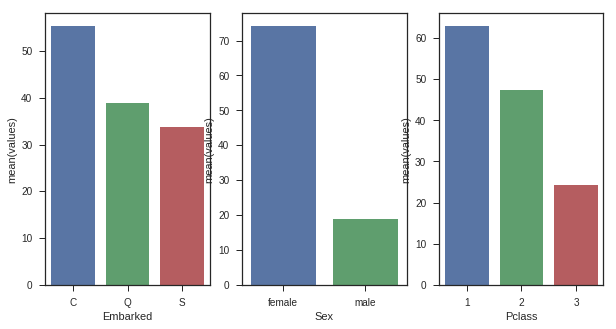

In [16]:
fig, x = plt.subplots(1,3, figsize= (10, 5))
x1 = sns.barplot(data = a1, x = 'Embarked', y = 'values', ax=x[0])
x2 = sns.barplot(data = b1, x = 'Sex', y = 'values', ax=x[1])
x3 = sns.barplot(data = c1, x = 'Pclass', y = 'values', ax=x[2])

##### **Conclusions**
Passengers emabarked at C survived most

Female passengers survived most

Passengers travelling in first class survived most

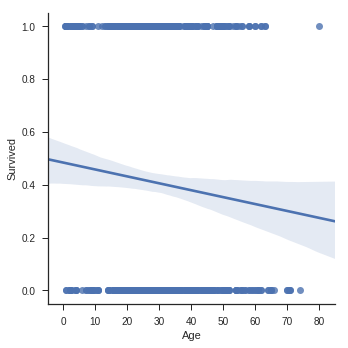

In [17]:
x = sns.lmplot(data = titanic, x = 'Age', y = 'Survived')

##### The plot shows the survival rate of the people. Higher age grouped people has less survival rate

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


##### All the columns are not numerical columns.  There are some columns  of object type (EX: Ticket - alphanumeric)

In [19]:
titanic.isnull().any(axis=0)

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

#####  There are null values present  in the columns named AGE, CABIN, EMBARKED

# Handling Null Values

In [20]:
median = titanic['Age'].median()
median

28.0

In [21]:
t1 = titanic['Age'].fillna(median)
t1.head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6     28.0
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [22]:
titanic['Age'].head(10)

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

##### the null values present in the column 'AGE' are replaced with the median of the same column. the median value of the column is 28.0

In [23]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
titanic[titanic['Embarked'].isnull()]

Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                                           
62           female  38.0      0      0  113572  80.0   B28      NaN  
830          female  62.0      0      0  113572  80.0   B28      NaN

##### There are only two rows in which null is present in the column 'EMBARKED'.  Only rows with passengerid's 62 and 830 have nulls 

In [26]:
mode = titanic['Embarked'].mode()
m1 = mode.values[0]
m1

'S'

In [27]:
t2 = titanic['Embarked'].fillna(m1)
t2.loc[62]

'S'

In [28]:
t2[62], t2[830]

('S', 'S')

##### The null values present in the 'EMBARKED' column are replaced with the mode of that column. The mode of the column is 'S'.

##### The column "CABIN" is dropped as it has insufficient information(only 204 values are filled, rest all are nulls)

##### The columns "Name" and "Ticket" can also be dropped as they dont have any effect on the target

In [29]:
titanic1 = titanic.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
titanic1.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
1                   0       3    male  22.0      1      0   7.2500        S
2                   1       1  female  38.0      1      0  71.2833        C
3                   1       3  female  26.0      0      0   7.9250        S
4                   1       1  female  35.0      1      0  53.1000        S
5                   0       3    male  35.0      0      0   8.0500        S

# Splitting of the data into training set  and test set

In [30]:
rn_train_set, rn_test_set = ms.train_test_split(titanic1, test_size = 0.1, random_state=42)  
rn_train_set.shape
rn_test_set.shape

(801, 8)

(90, 8)

##### the entire datset is split into 90% of training data and 10% test data

In [31]:
rn_train_set.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
166                 1       3    male   9.0      0      2  20.5250        S
542                 0       3  female   9.0      4      2  31.2750        S
626                 0       1    male  61.0      0      0  32.3208        S
389                 0       3    male   NaN      0      0   7.7292        Q
77                  0       3    male   NaN      0      0   7.8958        S

In [32]:
titanic_features = rn_train_set.drop('Survived', axis = 1)
titanic_labels = rn_train_set.Survived.copy()
titanic_numeric = titanic_features.drop(['Sex', 'Embarked', 'Pclass'], axis = 1)
titanic_categoric = titanic_features[['Sex', 'Embarked', 'Pclass']]

In [33]:
titanic_numeric.shape

(801, 4)

##### The training dataset is split into features(predictors) and labels(target). Again the feature columns are split into numerical and categorical columns

In [34]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.column_names].values

In [35]:
%run 'CategoricalEncoder.py'

In [36]:
def fillingnull(data, cols):
    for i in range(len(cols)):
        mode = data[cols[i]].mode()
        m1 = mode.values[0]
        data[cols[i]] = data[cols[i]].fillna(m1)
    return data

##### The abobe function fills the nans in the categorical columns with their respective modes

In [37]:
numeric_cols = list(titanic_numeric)
categorical_cols = ['Sex', 'Embarked', 'Pclass']

def fillingnull(data):
    cols = categorical_cols
    for i in range(len(cols)):
        mode = data[cols[i]].mode()
        m1 = mode.values[0]
        data[cols[i]] = data[cols[i]].fillna(m1)
    return data

numeric_cols_pipeline = Pipeline([('selector', ColumnSelector(numeric_cols)),
                                  ('imputer', Imputer(strategy='median')),
                                  ('standard_scaler', StandardScaler())
                                 ])
categorical_cols_pipeline = Pipeline([('filling nulls', FunctionTransformer(func = fillingnull,validate = False)),
                                       ('selector', ColumnSelector(categorical_cols)),
                                      ('encoder', CategoricalEncoder(encoding='onehot-dense'))
                                     ])
full_pipeline = FeatureUnion(transformer_list=[('numeric_pipeline', numeric_cols_pipeline),
                                               ('categorical_pipeline', categorical_cols_pipeline)
                                              ])

In [38]:
titanic_transformed = full_pipeline.fit_transform(rn_train_set)
titanic_transformed

array([[-1.56203526, -0.47096355,  2.01606834, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56203526,  3.07121298,  2.01606834, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.42028858, -0.47096355, -0.46643856, ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.88862556,  1.30012472, -0.46643856, ...,  0.        ,
         0.        ,  1.        ],
       [-1.17911951,  0.41458059,  2.01606834, ...,  1.        ,
         0.        ,  0.        ],
       [-0.64303745, -0.47096355,  0.77481489, ...,  1.        ,
         0.        ,  0.        ]])

In [39]:
titanic_transformed.shape

(801, 12)

##### Shape of the transformed dataset is (801,12)

In [40]:
corr_matrix = titanic1.corr()

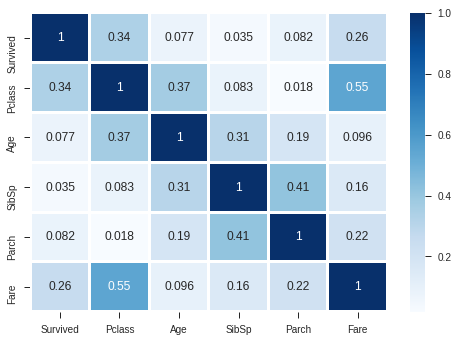

In [41]:
x = sns.heatmap(abs(corr_matrix), cmap='Blues', annot = True, linewidths=2,)

##### From the heatmap we can conclude that:
-->**Survival is highly correlated with pclass and fare**

-->**Pclass and fare are most correlated**


In [42]:
from biokit.viz import corrplot

In [43]:
c = corrplot.Corrplot(titanic1.corr())
c

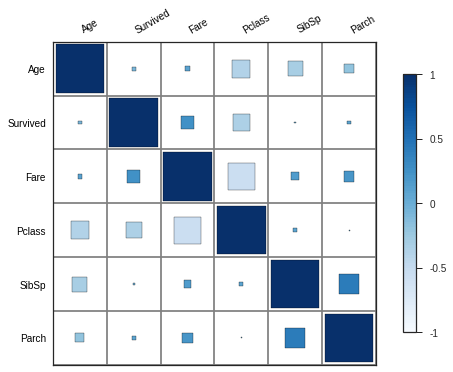

In [44]:
c.plot(method= 'square', cmap = 'Blues')

In [1]:
def performance(a,b,c):
    crossvalpredictions = cross_val_predict(a,b,c, cv=3) 
    con_mat = confusion_matrix(c, crossvalpredictions)
    pre_sco = precision_score(c, crossvalpredictions)
    rec_sco = recall_score(c, crossvalpredictions)
    f1_sco = f1_score(c, crossvalpredictions)
    #print('crossvalpredictions =', crossvalpredictions)
    print('confusionmatrix = ', con_mat)
    print('(prescisionscore, recallscore, f1score) = ', (pre_sco, rec_sco, f1_sco))

# Training with different classifiers

In [120]:
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(titanic_transformed, titanic_labels)
#sgd_clf.predict(titanic_transformed)

In [121]:
forest_clf = RandomForestClassifier(random_state=42)
x = forest_clf.fit(titanic_transformed, titanic_labels)
#forest_clf.predict(titanic_transformed)

In [122]:
gnb_clf = GaussianNB()
x = gnb_clf.fit(titanic_transformed, titanic_labels)
#gnb_clf.predict(titanic_transformed)

In [123]:
svc_clf = SVC(random_state=42)
x = svc_clf.fit(titanic_transformed, titanic_labels)
#svc_clf.predict(titanic_transformed)

##### Training is done using different classifiers. The classifiers used here are SGDClassifier, RandomForestClassifier, GaussianNB, SVC.  

# Performance of different classifiers

In [124]:
performance(sgd_clf,titanic_transformed,titanic_labels)     # SGDClassifer

confusionmatrix =  [[354 141]
 [ 98 208]]
(prescisionscore, recallscore, f1score) =  (0.59598853868194845, 0.6797385620915033, 0.63511450381679402)


In [125]:
performance(forest_clf,titanic_transformed,titanic_labels)  # RandomForestClassifier

confusionmatrix =  [[425  70]
 [101 205]]
(prescisionscore, recallscore, f1score) =  (0.74545454545454548, 0.66993464052287577, 0.70567986230636826)


In [126]:
performance(gnb_clf,titanic_transformed,titanic_labels)     # GaussianNB

confusionmatrix =  [[406  89]
 [ 92 214]]
(prescisionscore, recallscore, f1score) =  (0.70627062706270627, 0.69934640522875813, 0.70279146141215099)


In [127]:
performance(svc_clf,titanic_transformed,titanic_labels)     # SVC.

confusionmatrix =  [[443  52]
 [ 89 217]]
(prescisionscore, recallscore, f1score) =  (0.80669144981412644, 0.70915032679738566, 0.75478260869565228)


##### Among the different classifiers used for training support vector classifier has got good performance results.
**precision is 0.80669144981412644**

**recall is 0.70915032679738566**

**f1 score is 0.75478260869565228**

In [184]:
res = pd.DataFrame(data = {'sgd-classifier': (0.59598853868194845, 0.6797385620915033, 0.63511450381679402),
             'randomforest':  (0.74545454545454548, 0.66993464052287577, 0.70567986230636826),
             'gaussianNB': (0.70627062706270627, 0.69934640522875813, 0.70279146141215099),
            'svc-classifier': (0.80669144981412644, 0.70915032679738566, 0.75478260869565228),
                          'all-scores': ('precision', 'recall', 'f1score')})

res1 = res.set_index('all-scores')
res1

gaussianNB  randomforest  sgd-classifier  svc-classifier
all-scores                                                          
precision     0.706271      0.745455        0.595989        0.806691
recall        0.699346      0.669935        0.679739        0.709150
f1score       0.702791      0.705680        0.635115        0.754783

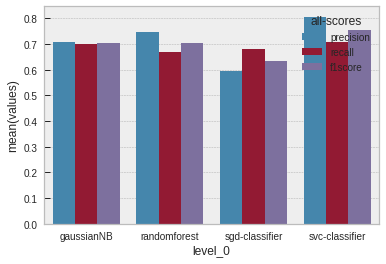

In [185]:
r = pd.DataFrame(res1.unstack(), columns = ['values']).reset_index()
x = sns.barplot(data = r, x = 'level_0', y = 'values', hue = 'all-scores')

##### SVC Classifer has got good performance results(good precision, recall and f1scores)

In [174]:
def plot_pr_v_t(precisions, recalls, thresholds):
    plt.figure(figsize=(14,8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim(0, 1)

In [172]:
y_scores = cross_val_predict(svc_clf, titanic_transformed,titanic_labels, cv=3, method='decision_function')
#y_scores
#precision_recall_curve(titanic_labels, y_scores)

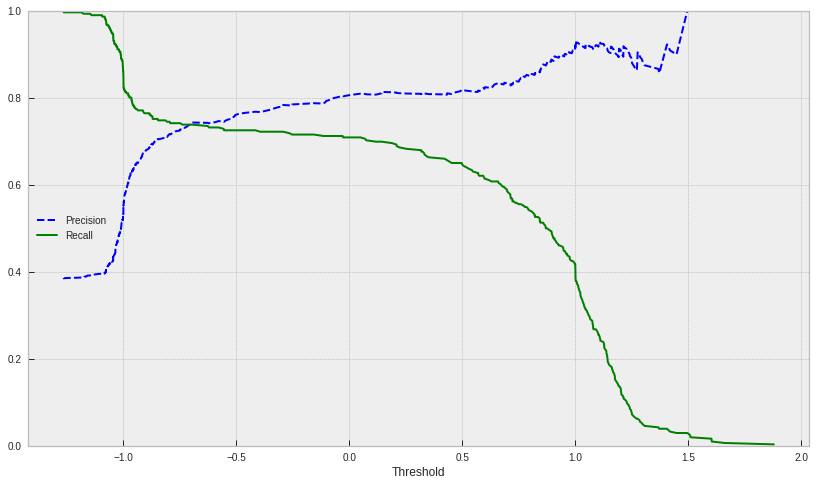

In [180]:
precisions, recalls, thresholds = precision_recall_curve(titanic_labels, y_scores)
plot_pr_v_t(precisions, recalls, thresholds)

# Tuning the hyper parametres

In [199]:
param_grid = [
        {'C': [1,2], 'kernel': ['linear', 'rbf'], 'gamma':[1, 2]},
    ]
svc_clf2 = SVC(random_state=42)
grid_search = GridSearchCV(svc_clf2, param_grid, cv=5,  n_jobs = 4)
x = grid_search.fit(titanic_transformed, titanic_labels)
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [145]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [200]:
final_model = grid_search.best_estimator_
predictions = final_model.predict(titanic_transformed)
performance(final_model,titanic_transformed,titanic_labels)

confusionmatrix =  [[446  49]
 [106 200]]
(prescisionscore, recallscore, f1score) =  (0.80321285140562249, 0.65359477124183007, 0.72072072072072069)


##### After tuning the hyper parameters, performance results(precision, recall and f1scores are compared)
**Before tuning:**

precision is 0.80669144981412644

recall is 0.70915032679738566

f1 score is 0.75478260869565228

**After tuning:**

precision is 0.80321285140562249

recall is 0.65359477124183007

f1 score is 0.72072072072072069

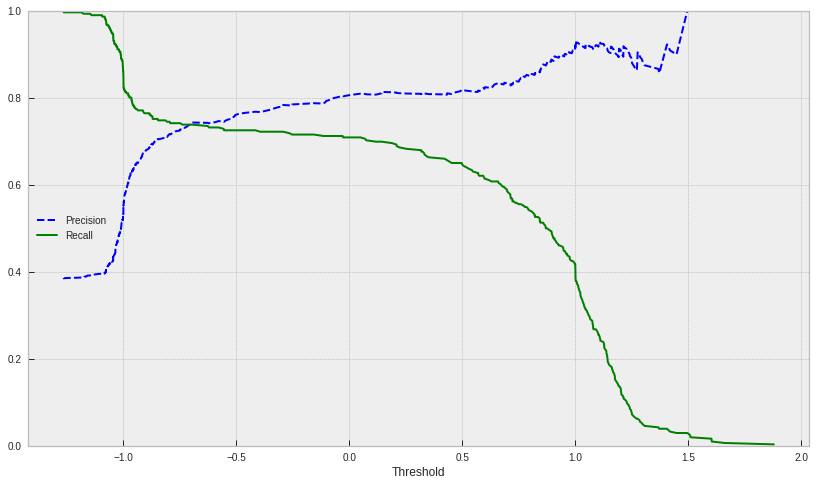

In [262]:
y_scores1 = cross_val_predict(svc_clf2, titanic_transformed,titanic_labels, cv=3, method='decision_function')
precisions1, recalls1, thresholds1 = precision_recall_curve(titanic_labels, y_scores1)
plot_pr_v_t(precisions1, recalls1, thresholds1)

In [132]:
titanic_test_features = rn_test_set.drop('Survived', axis = 1)
titanic_test_labels = rn_test_set.Survived.copy()

### On Test Data

In [201]:
final_model = grid_search.best_estimator_
X_test_transformed = full_pipeline.transform(titanic_test_features)
predictions = final_model.predict(X_test_transformed)
precision_score(titanic_test_labels, predictions)
recall_score(titanic_test_labels, predictions)
f1_score(titanic_test_labels, predictions)

0.75

0.75

0.75

##### Performance results of testscores
precision is 0.75

recall is 0.75

f1 score is 0.75

# RandomizedSearchCV

In [164]:
param_grid = {"C": randint(1, 3), 'gamma': randint(1, 100, 10), 'kernel': ['linear', 'rbf'] }
svc_clf3 = SVC(random_state=42)
random_search = RandomizedSearchCV(svc_clf3, param_grid, cv=5, n_jobs = 4, random_state=42)
x = random_search.fit(titanic_transformed, titanic_labels)
random_search.best_params_

{'C': 2, 'gamma': 32, 'kernel': 'linear'}

In [165]:
random_search.best_estimator_

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=32, kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [196]:
final_model1 = random_search.best_estimator_
predictions = final_model1.predict(titanic_transformed)
performance(final_model1,titanic_transformed,titanic_labels)

confusionmatrix =  [[425  70]
 [101 205]]
(prescisionscore, recallscore, f1score) =  (0.74545454545454548, 0.66993464052287577, 0.70567986230636826)


### On Test Data

In [197]:
final_model1 = random_search.best_estimator_
X_test_transformed = full_pipeline.transform(titanic_test_features)
predictions = final_model1.predict(X_test_transformed)
precision_score(titanic_test_labels, predictions)
recall_score(titanic_test_labels, predictions)
f1_score(titanic_test_labels, predictions)

0.7567567567567568

0.77777777777777779

0.76712328767123283

##### Randomized search results
**Training**

precision is 0.74545454545454548

recall is 0.66993464052287577

f1 score is 0.70567986230636826

**Test**

precision is 0.7567567567567568

recall is 0.77777777777777779

f1 score is 0.76712328767123283